# 2.3 - AdaBoost Algorithm Implementation on the UNSW-NB15 Dataset

Implementation of AdaBoost Classifier algorithm on the University of New South Wales NB15 Dataset.

## Importing libraries and fitting the data

In [1]:
import pandas as pd
import pickle as pk
import numpy as np
import matplotlib as plt
from sklearn.ensemble import AdaBoostClassifier

In [2]:
with open('../1.Data_Processing/dataset-nids.pkl', 'rb') as f:
    X_train, y_train, X_test, y_test = pk.load(f)

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3549974, 7), (3549974,), (508003, 7), (508003,))

In [4]:
abc = AdaBoostClassifier()

y_pred = abc.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 508003 points : 7359


## Plotting the Confusion Matrix

In [5]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

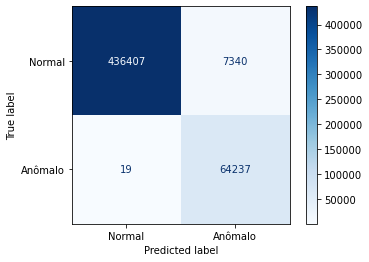

In [6]:
abc_fit = abc.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(abc_fit, X_test, y_test, cmap = 'Blues', display_labels=['Normal', 'Anômalo'])
plt.show()

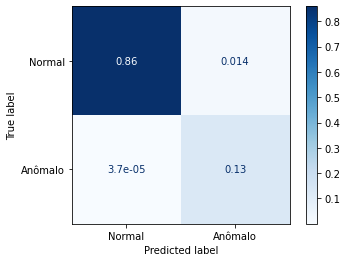

In [7]:
abc_fit = abc.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(abc_fit, X_test, y_test, normalize = 'all', cmap = 'Blues', display_labels=['Normal', 'Anômalo'])
plt.show()

## Plotting the ROC curve

In [17]:
y_pred_prob = abc_fit.predict_proba(X_test)[::,1]

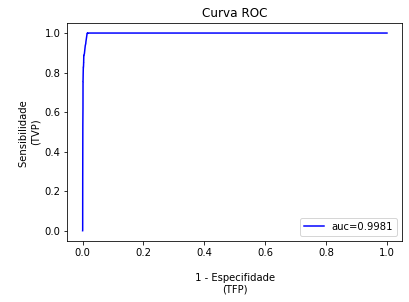

In [18]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,color='blue',label="auc="+str(round(auc,4)))
plt.ylabel('\nSensibilidade \n(TVP)')
plt.xlabel('\n 1 - Especifidade \n(TFP)')
plt.title('Curva ROC')
plt.legend(loc=4)
plt.show()

## Executing the Cross Validation

In [19]:
X_train = np.concatenate((X_train,X_test), axis = 0)
y_train = np.concatenate((y_train,y_test), axis = 0)

In [20]:
X_train.shape, y_train.shape

((4057977, 7), (4057977,))

In [21]:
from sklearn.model_selection import KFold, cross_validate

In [23]:
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc' ]
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
metrics = cross_validate(abc, X_train, y_train, cv=10, scoring= metrics)

for met in metrics:
    print(f"- {met}:")
    print(f"-- {metrics[met]}\n")
    print(f"-- {np.mean(metrics[met])} +- {np.std(metrics[met])}\n")  

- fit_time:
-- [92.41171455 93.0976727  92.62377238 89.42194414 89.79897308 90.67607141
 89.60350561 90.2568574  89.45611715 88.81527734]

-- 90.61619057655335 +- 1.4578549071010032

- score_time:
-- [3.59225035 3.55882335 3.52898097 3.47039628 3.47364545 3.440418
 3.43078661 3.4670136  3.43567872 3.49301767]

-- 3.4891010999679564 +- 0.05177632846988407

- test_accuracy:
-- [0.99133066 0.99164609 0.9912247  0.9913972  0.9910177  0.99131341
 0.9911902  0.99152039 0.99124685 0.99133557]

-- 0.9913222771188659 +- 0.00016597156902479492

- test_precision:
-- [0.98199792 0.98246364 0.98157167 0.98209314 0.98118284 0.98182207
 0.98178632 0.98226281 0.98167019 0.98192076]

-- 0.9818771356571592 +- 0.00034428930436257725

- test_recall:
-- [0.99918989 0.99940737 0.99940193 0.99923882 0.99934756 0.99933668
 0.99909745 0.99933668 0.99934756 0.99928231]

-- 0.999298624432274 +- 9.290820413947376e-05

- test_f1:
-- [0.99051931 0.99086308 0.99040656 0.99059179 0.9901819  0.99050195
 0.99036624 0.9